<a href="https://colab.research.google.com/github/Amritbhardwajgsv/machine-learning-learning-phase-/blob/main/polynomialregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Text(0, 0.5, 'y')

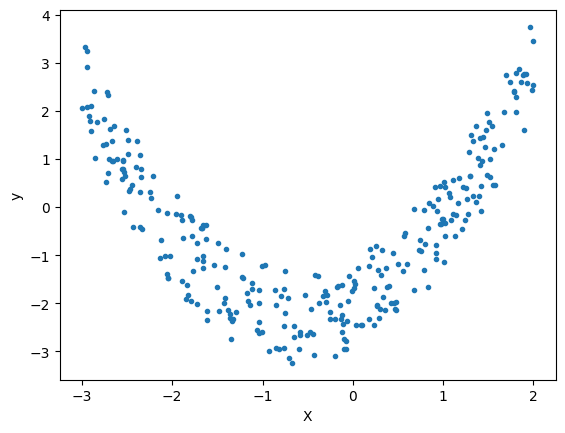

In [180]:
x=5*np.random.rand(300)-3;
y=0.8*x**2+0.9*x+2*np.random.rand(300)-3
plt.plot(x,y,'.')
plt.xlabel("X")
plt.ylabel("y")

In [181]:
# so we can visuallize here that this

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
lr=LinearRegression()

In [186]:
lr.fit(X_train.reshape(-1, 1),y_train)

LinearRegression()

In [187]:
y_pred=lr.predict(X_test.reshape(-1, 1))

In [188]:
from sklearn.metrics import mean_squared_error,r2_score

In [189]:
r2_score(y_test,y_pred)

-0.03376231655445827

Text(0, 0.5, 'y')

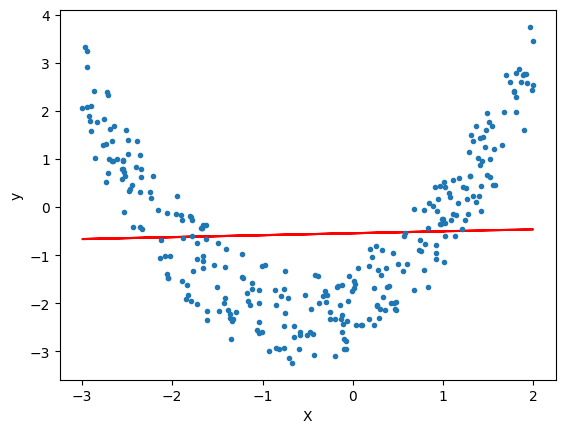

In [190]:
plt.plot(X_train,lr.predict(X_train.reshape(-1, 1)),'r')

plt.plot(x,y,'.')
plt.xlabel("X")
plt.ylabel("y")

In [191]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)

In [192]:
X_train_trans=poly.fit_transform(X_train.reshape(-1, 1))

In [193]:
X_test_trans=poly.fit_transform(X_test.reshape(-1, 1))

In [194]:
X_train[0]

np.float64(1.0096974469032132)

In [195]:
X_train_trans[0]

array([1.        , 1.00969745, 1.01948893])

In [196]:
#now we must know that there are two types of parameter inside this one is include_bias and another is to not include bias
 #the constant term gets removed
#  from sklearn.preprocessing import PolynomialFeatures
# poly=PolynomialFeatures(degree=2,include_bias=False)

In [197]:
lr=LinearRegression()

In [198]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [199]:
y_pred_trans=lr.predict(X_test_trans)

In [200]:
r2_score(y_test,y_pred_trans)

0.8705189594078512

In [201]:
lr.coef_

array([0.        , 0.91427619, 0.81375536])

In [202]:
lr.intercept_

np.float64(-2.0371901466996922)

Text(0, 0.5, 'y')

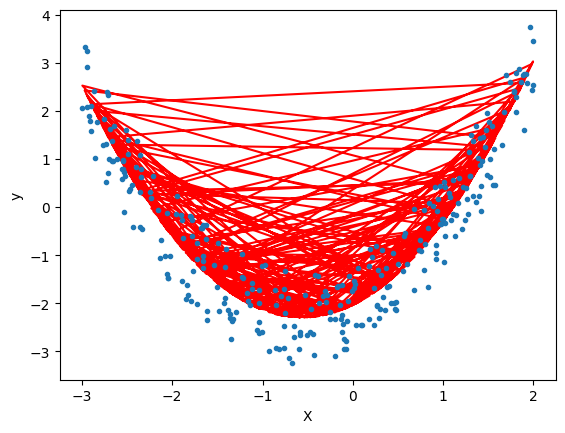

In [203]:
plt.plot(X_train,lr.predict(X_train_trans),'r')

plt.plot(x,y,'.')
plt.xlabel("X")
plt.ylabel("y")

In [204]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

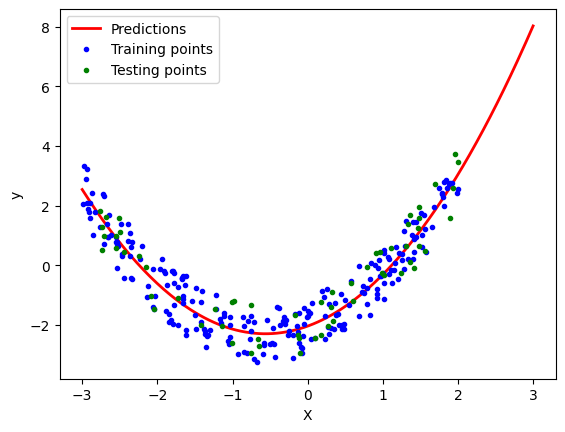

In [205]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [206]:
def polynomial_regression(degree, x, y):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    # Reshape x for sklearn
    x = x.reshape(-1, 1)

    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_newbig, 'r', label=f"Degree {degree}", linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3, label="Train")
    plt.plot(X_test, y_test, "g.", linewidth=3, label="Test")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.xlim(-3, 3)
    plt.ylim(min(y) - 2, max(y) + 2)

    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


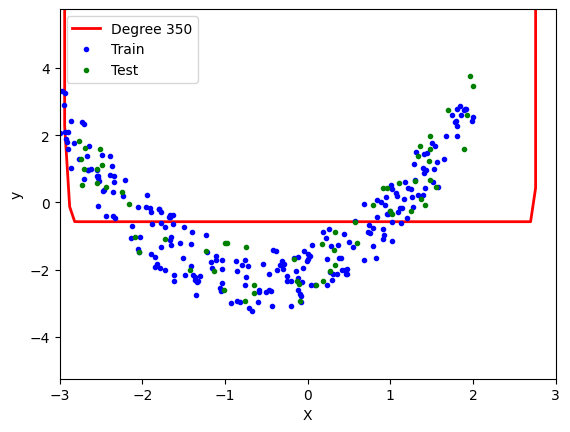

In [210]:
 polynomial_regression(350, x, y)

In [211]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [212]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [213]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [214]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [215]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [216]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [218]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [

In [219]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [220]:
X_test_multi = poly.transform(final)

In [221]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [222]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()